<a href="https://colab.research.google.com/github/jagadeesh01032005/explainable-AI/blob/main/explainable_AI_2290.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset:
    Number of TV Ads (x)  Number of Cars Sold (y)
0                     1                       14
1                     3                       24
2                     2                       18
3                     1                       17
4                     3                       27

Linear Regression Equation: y = 5.00 * x + 10.00

Interpretation:
  • Slope: For each additional TV ad, car sales increase by ~5.00 units.
  • Intercept: If no ads are aired, estimated sales are ~10.00 cars.

Predicted Cars Sold for 10 TV Ads: 60.00

SHAP Waterfall Plot for first instance:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


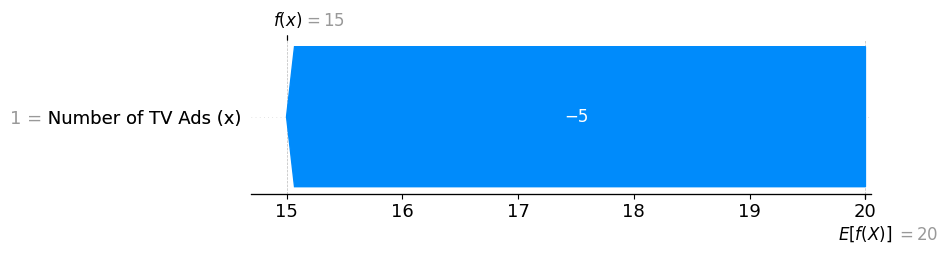


SHAP Summary Plot (Force-like view):

SHAP Summary Bar Plot:


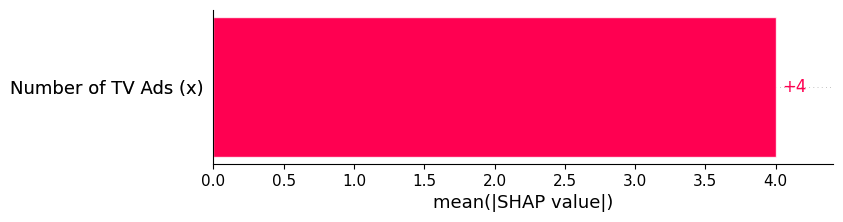


SHAP Values for all instances:
[[-5.]
 [ 5.]
 [ 0.]
 [-5.]
 [ 5.]]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = '/content/Car_Sales.xlsx'
df = pd.read_excel(file_path)

print("Dataset:\n", df)

X = df[['Number of TV Ads (x)']]
y = df['Number of Cars Sold (y)']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]
print(f"\nLinear Regression Equation: y = {slope:.2f} * x + {intercept:.2f}")

print(f"\nInterpretation:")
print(f"  • Slope: For each additional TV ad, car sales increase by ~{slope:.2f} units.")
print(f"  • Intercept: If no ads are aired, estimated sales are ~{intercept:.2f} cars.")

pred_10_ads = model.predict([[10]])[0]
print(f"\nPredicted Cars Sold for 10 TV Ads: {pred_10_ads:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

print("\nSHAP Waterfall Plot for first instance:")
shap.plots.waterfall(shap_values[0])

print("\nSHAP Summary Plot (Force-like view):")
shap.plots.force(shap_values)

print("\nSHAP Summary Bar Plot:")
shap.plots.bar(shap_values)

print("\nSHAP Values for all instances:")
print(shap_values.values)

📊 Dataset:
    IQ \n  StudyHours  TestScore
0    110          40        100
1    120          30         90
2    100          20         80
3     90           0         70
4     80          10         60

📈 Linear Regression Equation:
Test Score = 0.50 * IQ + 0.50 * Study Hours + 20.00

🧠 Interpretation:
• IQ Coefficient (0.50): For each additional IQ point, the test score increases by about 0.50 (holding study hours constant).
• Study Hours Coefficient (0.50): For each additional hour studied, the test score increases by about 0.50 (holding IQ constant).
• Intercept (20.00): Expected test score when IQ = 0 and Study Hours = 0 (theoretical baseline).

🔮 Predicted Test Score for IQ=95 and Study Hours=25: 80.00

🌊 SHAP Waterfall Plot for first student:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


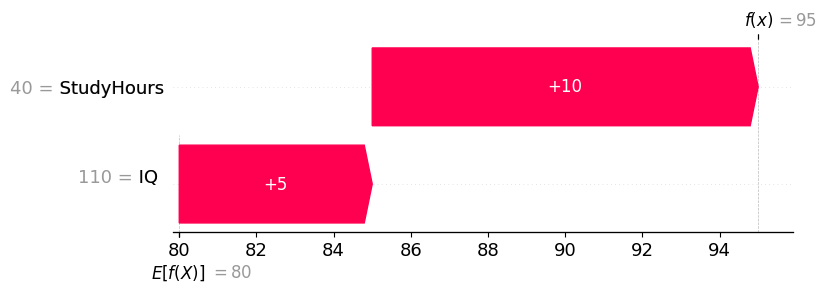


💡 SHAP Force Plot for all predictions:

📊 SHAP Summary Bar Plot:


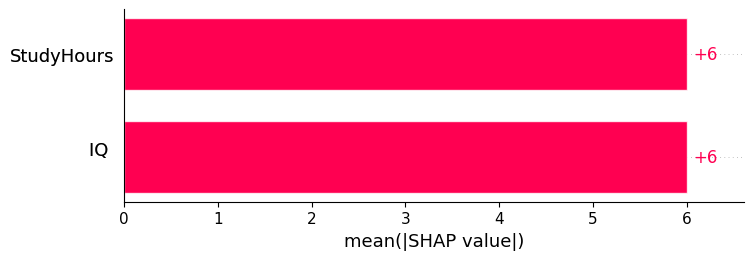


📌 SHAP Values (Feature Contributions per Student):
   IQ \n  StudyHours  Student
0    5.0        10.0        1
1   10.0         5.0        2
2    0.0         0.0        3
3   -5.0       -10.0        4
4  -10.0        -5.0        5

🔍 Students where Study Hours contributes more than IQ:
   Student  IQ \n  StudyHours
0        1    5.0        10.0
4        5  -10.0        -5.0


In [13]:

import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

file_path = '/content/StudyHour.xlsx'
df = pd.read_excel(file_path)

print("📊 Dataset:\n", df)

X = df[['IQ \n', 'StudyHours']]
y = df['TestScore']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coeff_iq, coeff_study = model.coef_

print(f"\n📈 Linear Regression Equation:")
print(f"Test Score = {coeff_iq:.2f} * IQ + {coeff_study:.2f} * Study Hours + {intercept:.2f}")

print(f"\n🧠 Interpretation:")
print(f"• IQ Coefficient ({coeff_iq:.2f}): For each additional IQ point, the test score increases by about {coeff_iq:.2f} (holding study hours constant).")
print(f"• Study Hours Coefficient ({coeff_study:.2f}): For each additional hour studied, the test score increases by about {coeff_study:.2f} (holding IQ constant).")
print(f"• Intercept ({intercept:.2f}): Expected test score when IQ = 0 and Study Hours = 0 (theoretical baseline).")

input_data = np.array([[95, 25]])
predicted_score = model.predict(input_data)[0]
print(f"\n🔮 Predicted Test Score for IQ=95 and Study Hours=25: {predicted_score:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

print("\n🌊 SHAP Waterfall Plot for first student:")
shap.plots.waterfall(shap_values[0])

print("\n💡 SHAP Force Plot for all predictions:")
shap.plots.force(shap_values)

print("\n📊 SHAP Summary Bar Plot:")
shap.plots.bar(shap_values)

print("\n📌 SHAP Values (Feature Contributions per Student):")
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)
shap_df['Student'] = df.index + 1
print(shap_df)

more_study_contribution = shap_df[shap_df['StudyHours'] > shap_df['IQ \n']]
print("\n🔍 Students where Study Hours contributes more than IQ:")
print(more_study_contribution[['Student', 'IQ \n', 'StudyHours']])

📊 Dataset Preview:
    YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

📈 Linear Regression Equation:
Salary = 9449.96 * YearsExperience + 25792.20

🧠 Interpretation:
• Slope (9449.96): For each additional year of experience, salary increases by approximately 9449.96 units.
• Intercept (25792.20): Predicted salary for someone with 0 years of experience.

🔮 Predicted Salary for 3.5 years experience: 58867.07
🔮 Predicted Salary for 7 years experience: 91941.94

🌊 SHAP Waterfall Plot for first instance:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


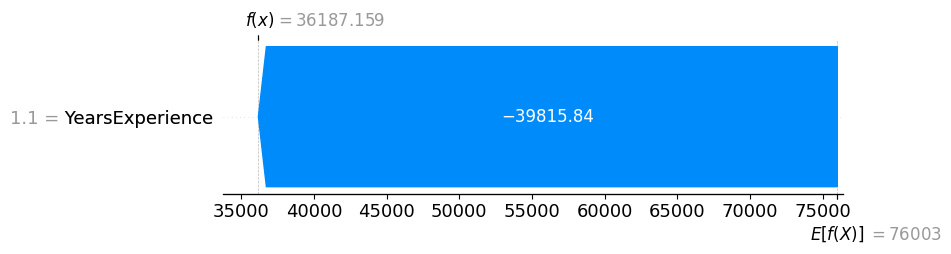


💡 SHAP Force Plot for all predictions:

📊 SHAP Summary Bar Plot:


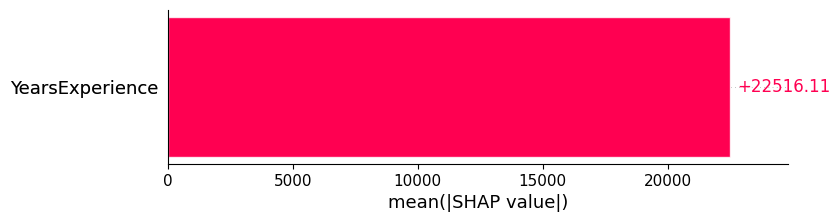


📌 SHAP Values per Instance:
     YearsExperience  Instance
0     -39815.841248         1
1     -37925.848783         2
2     -36035.856319         3
3     -31310.875158         4
4     -29420.882694         5
5     -22805.909069         6
6     -21860.912837         7
7     -19970.920373         8
8     -19970.920373         9
9     -15245.939212        10
10    -13355.946748        11
11    -12410.950516        12
12    -12410.950516        13
13    -11465.954283        14
14     -7685.969355        15
15     -3905.984426        16
16     -2015.991962        17
17      -125.999498        18
18      5543.977895        19
19      6488.974127        20
20     14048.943985        21
21     16883.932681        22
22     24443.902538        23
23     27278.891235        24
24     32003.872395        25
25     34838.861092        26
26     39563.842252        27
27     40508.838485        28
28     47123.812110        29
29     49013.804574        30

🧠 SHAP Analysis:
• SHAP values show how

In [15]:

import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

file_path = '/content/Experience_Salary.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

print("📊 Dataset Preview:\n", df.head())

X = df[['YearsExperience']]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f"\n📈 Linear Regression Equation:")
print(f"Salary = {slope:.2f} * YearsExperience + {intercept:.2f}")

print(f"\n🧠 Interpretation:")
print(f"• Slope ({slope:.2f}): For each additional year of experience, salary increases by approximately {slope:.2f} units.")
print(f"• Intercept ({intercept:.2f}): Predicted salary for someone with 0 years of experience.")

prediction_3_5 = model.predict([[3.5]])[0]
prediction_7 = model.predict([[7]])[0]
print(f"\n🔮 Predicted Salary for 3.5 years experience: {prediction_3_5:.2f}")
print(f"🔮 Predicted Salary for 7 years experience: {prediction_7:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

print("\n🌊 SHAP Waterfall Plot for first instance:")
shap.plots.waterfall(shap_values[0])

print("\n💡 SHAP Force Plot for all predictions:")
shap.plots.force(shap_values)

print("\n📊 SHAP Summary Bar Plot:")
shap.plots.bar(shap_values)

shap_df = pd.DataFrame(shap_values.values, columns=['YearsExperience'])
shap_df['Instance'] = df.index + 1
print("\n📌 SHAP Values per Instance:\n", shap_df)

print("\n🧠 SHAP Analysis:")
print("• SHAP values show how YearsExperience contributes to each salary prediction.")
print("• Contribution increases as experience increases — confirming consistent growth impact.")


Equation: Sales = 993.92 + (8.22 * Intelligence) + (49.71 * Extroversion)
Slope for Intelligence: 8.22
Slope for Extroversion: 49.71
Intercept: 993.92
Prediction (Intelligence=100, Extroversion=25): $3058.63
Prediction (Intelligence=120, Extroversion=18): $2875.07

SHAP Waterfall plot for first instance:


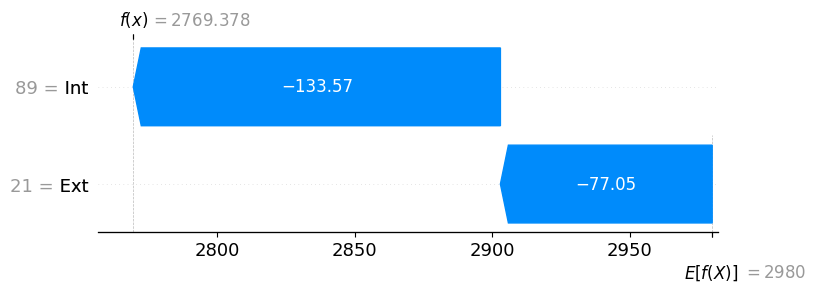


SHAP Force plot for all predictions:

SHAP Summary Bar Plot:


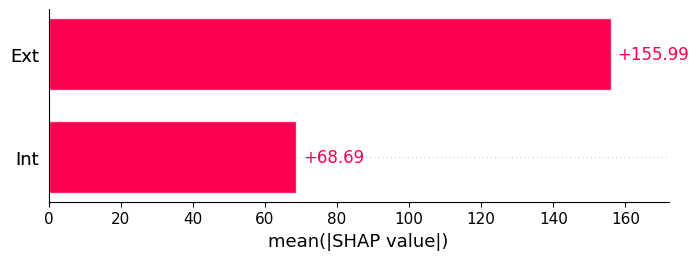

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_excel("/content/Int_Ext.xlsx")

X = df[['Int', 'Ext']]
y = df['sal']
df_cleaned = df[['Int', 'Ext', 'sal']].dropna()
X_cleaned = df_cleaned[['Int', 'Ext']]
y_cleaned = df_cleaned['sal']

model = LinearRegression()
model.fit(X_cleaned, y_cleaned)

print(f"Equation: Sales = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * Intelligence) + ({model.coef_[1]:.2f} * Extroversion)")

print(f"Slope for Intelligence: {model.coef_[0]:.2f}")
print(f"Slope for Extroversion: {model.coef_[1]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

input_data_pred1 = pd.DataFrame([[100, 25]], columns=['Int', 'Ext'])
input_data_pred2 = pd.DataFrame([[120, 18]], columns=['Int', 'Ext'])

pred1 = model.predict(input_data_pred1)[0]
pred2 = model.predict(input_data_pred2)[0]
print(f"Prediction (Intelligence=100, Extroversion=25): ${pred1:.2f}")
print(f"Prediction (Intelligence=120, Extroversion=18): ${pred2:.2f}")

explainer = shap.Explainer(model, X_cleaned)
shap_values = explainer(X_cleaned)

print("\nSHAP Waterfall plot for first instance:")
shap.plots.waterfall(shap_values[0])
plt.show()
print("\nSHAP Force plot for all predictions:")
shap.plots.force(shap_values)
plt.show()
print("\nSHAP Summary Bar Plot:")
shap.plots.bar(shap_values)
plt.show()

Dataset Preview:
   youtube  facebook  newspaper  sales
0   276.12     45.36      83.04  26.52
1    53.40     47.16      54.12  12.48
2    20.64     55.08      83.16  11.16
3   181.80     49.56      70.20  22.20
4   216.96     12.96      70.08  15.48

=== Regression Equation ===
Sales = 11.22 + (0.20)*Facebook + (0.00)*Newspaper

=== Predictions ===
Weekly Sales for Facebook=50, Newspaper=70: 21.58 ($1000s)
Weekly Sales for Facebook=25, Newspaper=30: 16.39 ($1000s)

Calculating SHAP values...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Displaying SHAP Force Plot for first prediction:

Displaying SHAP Waterfall Plot for first prediction:


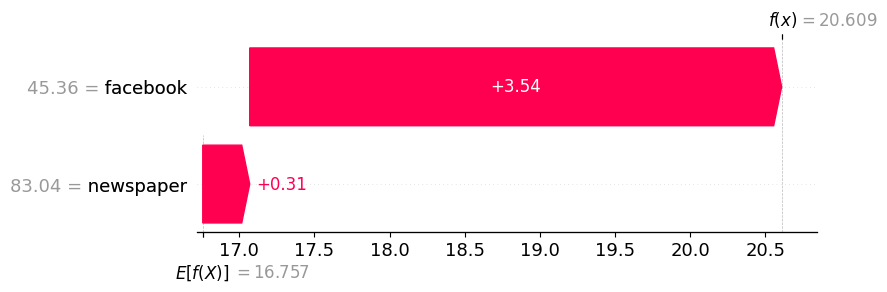


Displaying SHAP Summary Plot (Feature Importance):


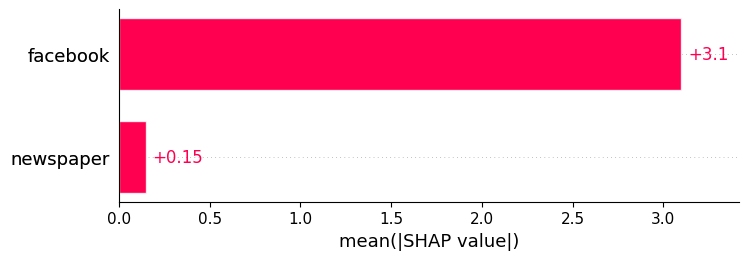

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

shap.initjs()

file_path = '/content/Marketing_Dataset.xlsx'
df = pd.read_excel(file_path)
print("Dataset Preview:")
print(df.head())

X = df[['facebook', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

intercept = model.intercept_
facebook_coef = model.coef_[0]
newspaper_coef = model.coef_[1]

print("\n=== Regression Equation ===")
print(f"Sales = {intercept:.2f} + ({facebook_coef:.2f})*Facebook + ({newspaper_coef:.2f})*Newspaper")

pred1 = model.predict([[50, 70]])[0]
pred2 = model.predict([[25, 30]])[0]

print("\n=== Predictions ===")
print(f"Weekly Sales for Facebook=50, Newspaper=70: {pred1:.2f} ($1000s)")
print(f"Weekly Sales for Facebook=25, Newspaper=30: {pred2:.2f} ($1000s)")

print("\nCalculating SHAP values...")

model_full = LinearRegression()
model_full.fit(X, y)

explainer = shap.Explainer(model_full.predict, X)
shap_values = explainer(X)

print("\nDisplaying SHAP Force Plot for first prediction:")
shap.plots.force(shap_values[0])
plt.show()
print("\nDisplaying SHAP Waterfall Plot for first prediction:")
shap.plots.waterfall(shap_values[0])
plt.show()
print("\nDisplaying SHAP Summary Plot (Feature Importance):")
shap.plots.bar(shap_values)
plt.show()